# 이미지 분류 (완전연결층)
- Fashion-mnist 데이터셋

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# 데이터준비

In [29]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [10]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [30]:
# 시각화

samples = np.random.randint(60000, size=9)
samples


array([42720, 45459, 28750, 25039,  7886,  2208, 10400, 24902, 23505])

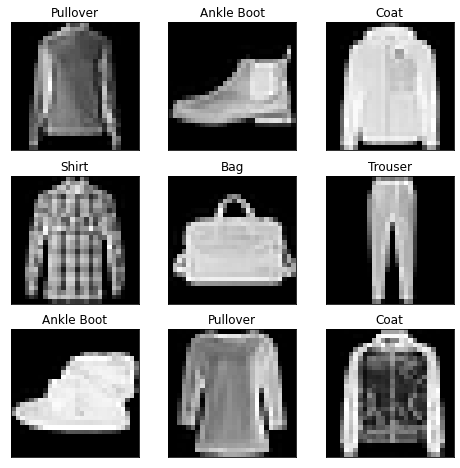

In [31]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[idx], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(class_name[y_train[idx]])
plt.show()

# 검증용 데이터 (Validation Data)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

print(X_train.shape, X_val.shape) 
print(y_train.shape, y_test.shape)

(42000, 28, 28) (18000, 28, 28)
(42000,) (10000,)


# 정규화

In [33]:
X_train = X_train.astype('float32')/255.
X_val = X_val/255.
X_test = X_test/255.


In [34]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [35]:
y_train[:10]

array([7, 1, 4, 3, 4, 9, 4, 8, 2, 8], dtype=uint8)

In [36]:
# 원핫인코딩 (다중분류)

from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

In [37]:
y_train_oh[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
X_train = X_train.reshape(-1, 28*28)                                 #28*28 이미지를 2차원에서 1차원으로 변경 (1*784)
X_val = X_val.reshape(-1, 28*28)   
X_test = X_test.reshape(-1, 28*28)   

In [40]:
X_train.shape

(42000, 784)

In [44]:
y_train_oh.shape

(42000, 10)

# 모델

In [42]:
model = keras.Sequential([
    layers.Dense(units=256, activation='relu', input_shape=(784, )),                        #reshape 된 X_train input_shape과 input_shape 일치치 = 784
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=10, activation='softmax')                                            #최종 출력층 : y_train_oh.shape과 units 일치 = 10
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [45]:
EPOCHS = 50
BATCH_SIZE = 32

log = model.fit(X_train, y_train_oh,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val, y_val_oh),
                verbose = 1)

Epoch 1/50
1313/1313 [==============================] - 7s 4ms/step - loss: 0.5356 - acc: 0.8068 - val_loss: 0.4288 - val_acc: 0.8458
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3929 - acc: 0.8531 - val_loss: 0.3838 - val_acc: 0.8619
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3497 - acc: 0.8712 - val_loss: 0.3970 - val_acc: 0.8550
Epoch 4/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3248 - acc: 0.8800 - val_loss: 0.3334 - val_acc: 0.8796
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3085 - acc: 0.8856 - val_loss: 0.3513 - val_acc: 0.8706
Epoch 6/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2913 - acc: 0.8921 - val_loss: 0.3197 - val_acc: 0.8844
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2804 - acc: 0.8948 - val_loss: 0.3369 - val_acc: 0.8803
Epoch 8/50
1313/1313 [==============================] - 5s 4ms

In [49]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

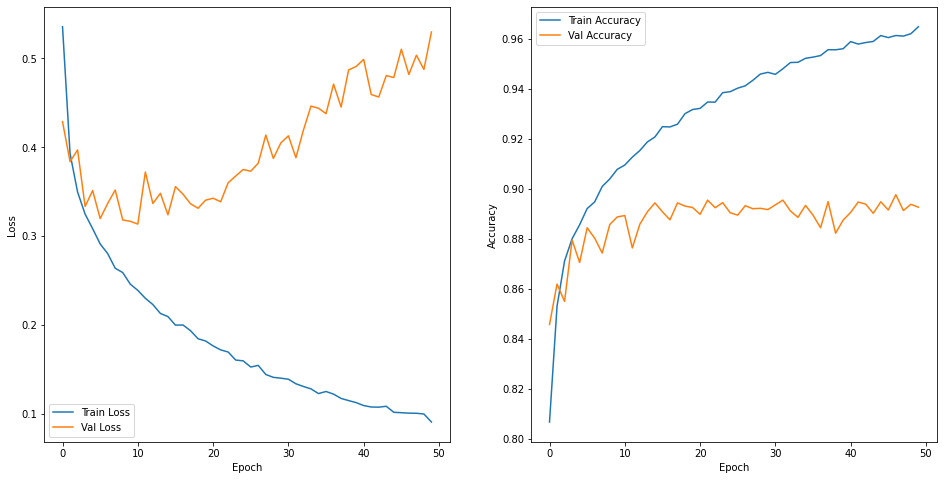

In [50]:
plot_history(log)

In [51]:
# 평가

model.evaluate(X_train, y_train_oh)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0834 - acc: 0.9680


[0.08338142931461334, 0.9679523706436157]

In [52]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.6175 - acc: 0.8812


[0.6174693703651428, 0.8812000155448914]

In [53]:
# 예측

y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.8959701e-08, 1.4768558e-07, 5.4775096e-06, 1.3412141e-07,
        6.9608834e-09, 7.2744128e-04, 7.5745284e-08, 1.5443083e-03,
        3.1966827e-06, 9.9771911e-01],
       [1.0190039e-04, 1.7541371e-16, 9.9528110e-01, 2.1616706e-12,
        4.6110419e-03, 3.0346669e-19, 5.9762833e-06, 2.2456470e-24,
        9.0951718e-17, 2.6061122e-22],
       [1.6619206e-35, 9.9999994e-01, 0.0000000e+00, 5.9756347e-35,
        0.0000000e+00, 0.0000000e+00, 3.5966944e-35, 0.0000000e+00,
        5.3670908e-38, 0.0000000e+00],
       [1.2276783e-28, 9.9999994e-01, 8.7005068e-34, 1.1115617e-23,
        1.7380787e-37, 0.0000000e+00, 1.1767001e-26, 0.0000000e+00,
        1.3160941e-25, 0.0000000e+00],
       [2.7897393e-02, 3.8275254e-16, 8.4602584e-07, 3.6141312e-08,
        1.3540279e-08, 3.1931971e-19, 9.7210169e-01, 1.9455674e-21,
        2.2499891e-11, 6.4965117e-20]], dtype=float32)

In [54]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

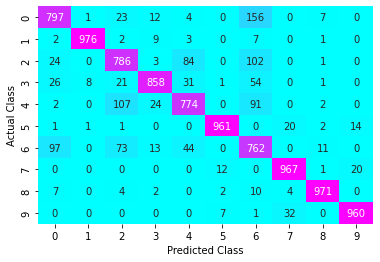

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False, cmap='cool', fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [58]:
# 오답인 이미지를 시각화

samples = np.where((y_test == y_pred) == False)[0]
samples = np.random.choice(samples, 9)
samples

array([7545, 4694, 3937, 5525, 9276,  368,   40, 5168, 2897])

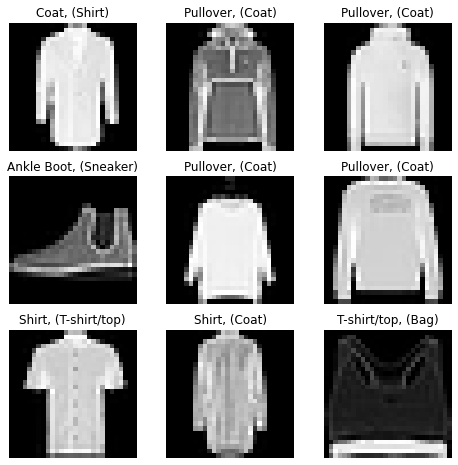

In [60]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')                          #이미지로 나타내기 위해 X_test 다시 reshape
  plt.axis('off')
  plt.title(f'{class_name[y_test[idx]]}, ({class_name[y_pred[idx]]})')
plt.show()